In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0


In [4]:
# total columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

In [5]:
# dimentions (rows, columns)
df.shape

(891, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

In [7]:
# statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000,887.000000,889.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,665.466817,29.322063,2.307087
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,380.796997,13.930089,0.837713
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.420000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,336.000000,20.000000,2.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,672.000000,28.000000,3.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,996.000000,38.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1314.000000,74.000000,3.000000


* The average age was 30 years old
* Less than 40% survived

In [8]:
# categoric variables
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked,Name_wiki,Hometown,Boarded,Destination,Lifeboat,Body
count,891,891,891,204,889,889,889,889,889,345,87
unique,891,2,681,147,3,889,437,4,234,22,87
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S,"Braund, Mr. Owen Harris","New York, New York, US",Southampton,New York City,15,175MB
freq,1,577,7,4,644,1,50,638,168,28,1


* Most of tripulants were male

In [9]:
df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

* Most of tripulats died

In [10]:
Sur_Sex=df.groupby(['Survived','Sex']).count()['PassengerId']
Sur_Sex

Survived  Sex   
0.0       female     81
          male      468
1.0       female    233
          male      109
Name: PassengerId, dtype: int64

* Most of the survived were women
* Most of the men died
* Most of passengers were men

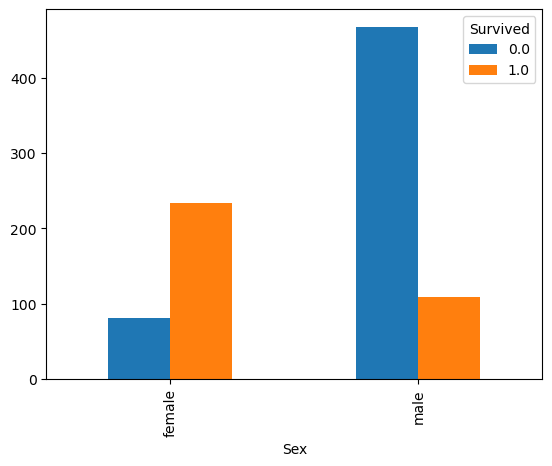

In [11]:
Sur_Sex.unstack(level=0).plot.bar()
plt.show()

In [12]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

* Most of passengers were in 3 class

In [13]:
Sur_Pcl=df.groupby(['Survived','Pclass']).count()['PassengerId']
Sur_Pcl

Survived  Pclass
0.0       1          80
          2          97
          3         372
1.0       1         136
          2          87
          3         119
Name: PassengerId, dtype: int64

* Most of passengers in class 3 died
* Most of passengers in class 1 survived

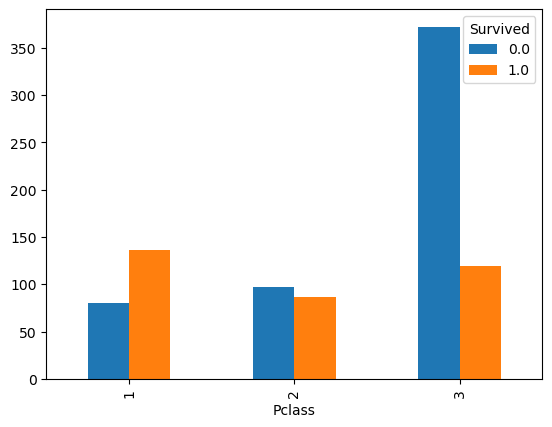

In [14]:
Sur_Pcl.unstack(level=0).plot.bar()
plt.show()

In [15]:
df.groupby(['Sex','Pclass']).count()['PassengerId']

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: PassengerId, dtype: int64

In [16]:
# classification
dic={'Children':[0,17], 'Young adults':[18,40], 'Adults':[41,60], 'Old Adults':[61,100]}
# loop
for key, value in dic.items():
    # query
    ages=df[np.logical_and(df['Age']>=value[0], df['Age']<value[1])].count()['PassengerId']
    # print
    print(key, ' with age between', value[0], ' and ', value[1], ' were ', ages)

Children  with age between 0  and  17  were  100
Young adults  with age between 18  and  40  were  438
Adults  with age between 41  and  60  were  122
Old Adults  with age between 61  and  100  were  22


In [17]:
# minuto 12, https://www.youtube.com/watch?v=VkU-9Us6Rpw